# Example usage

To use `energy_manager` in a project:

## 0. Installation

In [1]:
# %pip install matplotlib # matplotlib is installed for plotting
# %pip install energy_manager==0.1.4 # (the latest version is currently 0.1.4)

## 1. Imports

In [2]:
import os
import pandas as pd
import energy_manager
import matplotlib.pyplot as plt
from energy_manager.expenses.compute_daily_expenses import compute_daily_expenses

In [3]:
# You can explore the function signature
?? compute_daily_expenses

Signature:
 compute_daily_expenses(
    user_city_name: str,
    openweathermap_api_key: str,
    user_temperature: float,
    user_dpe_usage: float,
    user_insulation_factor: Optional[float] = 1.0,
) -> Optional[pandas.core.frame.DataFrame]
Source:   
def compute_daily_expenses(
    user_city_name: str,
    openweathermap_api_key: str,
    user_temperature: float,
    user_dpe_usage: float,
    user_insulation_factor: Optional[float] = 1.0
) -> Optional[pd.DataFrame]:
    """
    Calculate expenses based on user input and city data.

    Args:
        user_city_name (str): Name of the user's city.
        openweathermap_api_key (str): OpenWeatherMap API key.
        user_temperature (float): Desired temperature by the user.
        user_dpe_usage (float): User's DPE usage.
        user_insulation_factor (float, optional): User's insulation factor. Defaults to 1.0.

    Returns:
        Optional[pd.DataFrame]: DataFrame with calculated expenses or None if data is not found.
    """
 

## 2. Define mandatory parameters

In [4]:
user_city_name = "Nangis"
openweathermap_api_key = os.getenv("OPEN_WEATHER_API_KEY") # it's supposed that you set your openweathermap api key as an environment variable
user_temperature = 19.5
user_dpe_usage = 1.5

## 3. Define optional parameters if you want

In [5]:
user_insulation_factor = 1.0

## 4. Call the function compute_daily_expenses with your set of parameters

In [6]:
df_daily_expenses = compute_daily_expenses(
        user_temperature=user_temperature,
        user_city_name=user_city_name,
        openweathermap_api_key=openweathermap_api_key,
        user_dpe_usage=user_dpe_usage,
        user_insulation_factor=user_insulation_factor
        )

In [7]:
# You can explore your results and do any manipulation you want
df_daily_expenses.dtypes

date_time              datetime64[ns]
weather_description            object
option_0                      float64
option_1                      float64
option_2                      float64
option_3                      float64
option_4                      float64
building_type                  object
dpe_class                      object
dtype: object

In [8]:
# You can explore your results and do any manipulation you want
df_daily_expenses[["date_time", "weather_description", "building_type", "dpe_class", "option_0", "option_3"]].head()

,date_time,weather_description,building_type,dpe_class,option_0,option_3
0,2024-12-05 00:00:00,overcast clouds,Appartement,A,4.795048,3.941240
1,2024-12-05 01:00:00,overcast clouds,Appartement,A,4.776953,3.926367
2,2024-12-05 02:00:00,overcast clouds,Appartement,A,4.813142,3.956112
3,2024-12-05 03:00:00,overcast clouds,Appartement,A,4.795048,3.941240
4,2024-12-05 04:00:00,overcast clouds,Appartement,A,4.749812,3.904058


## 5. Results meaning

Columns option_0, option_1, ..., option_4 values are energy costs in euros per square meter.

Settings of these 5 options provided by ENEDIS for EDF consumers are such as :

  - option_0 : energy price is the same at any hour of the day with a value of 25.16 euros/kwh;
  - option_1, ..., option_4 : energy price during peak hour is 27 euros/Kwh and is 20.68 euros/Kwh during for off-peak hours.


The first row of df_daily_expenses means that for the day 2024-12-05 from 00:00:00 to 01:00:00, if your house is an "Appartement" and has a DPE (diagnostic de performance energetique) of class A, your estimated energy cost for the option_0 is aproximately 4.8 euros per square meter for the desired temperature of 19.5 degrees Celsius.

In [9]:
# Further digging on "Appartement" and dpe_class "A"
df = df_daily_expenses[(df_daily_expenses["building_type"] == "Appartement") & (df_daily_expenses["dpe_class"] == "A")]

In [10]:
# Further digging on only two options prices : "option_0", "option_3"
df[["date_time", "weather_description", "dpe_class", "option_0", "option_3"]].sample(n=10)

,date_time,weather_description,dpe_class,option_0,option_3
16,2024-12-05 16:00:00,overcast clouds,A,3.643030,3.909452
2,2024-12-05 02:00:00,overcast clouds,A,4.813142,3.956112
9,2024-12-05 09:00:00,light rain,A,4.577914,4.912705
14,2024-12-05 14:00:00,overcast clouds,A,3.833023,4.113339
15,2024-12-05 15:00:00,overcast clouds,A,3.543510,3.802654
3,2024-12-05 03:00:00,overcast clouds,A,4.795048,3.941240
4,2024-12-05 04:00:00,overcast clouds,A,4.749812,3.904058
22,2024-12-05 22:00:00,light rain,A,3.015753,3.236301
0,2024-12-05 00:00:00,overcast clouds,A,4.795048,3.941240
12,2024-12-05 12:00:00,light rain,A,4.146661,4.449914


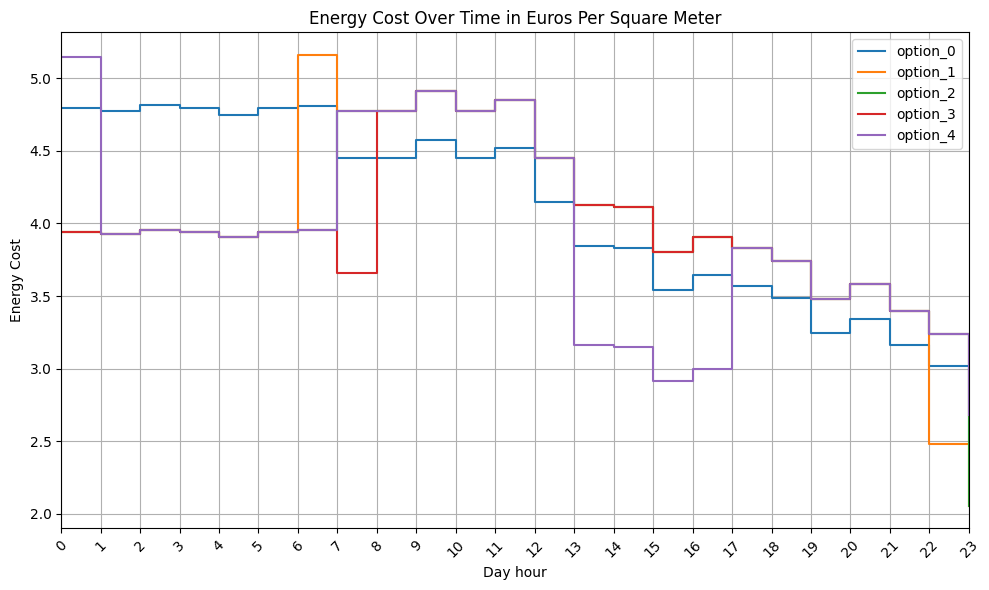

In [11]:
# Some plot
plt.figure(figsize=(10, 6))

# Plot each option
for option in ['option_0', 'option_1', 'option_2', 'option_3', 'option_4']:
    plt.step(df.date_time.dt.hour, df[option], where='post', label=option)

# Adding labels and title
plt.title('Energy Cost Over Time in Euros Per Square Meter')
plt.xlabel('Day hour')
plt.ylabel('Energy Cost')
plt.xticks(rotation=45)
plt.xticks(range(24))
plt.xlim(0, 23)
plt.legend()
plt.grid()

# Show plot
plt.tight_layout()
plt.show()

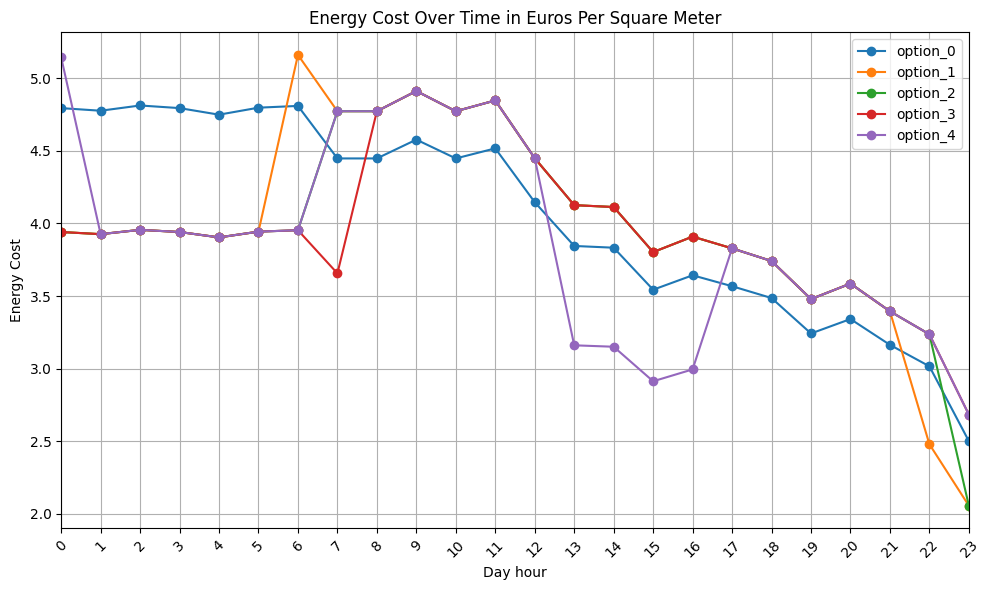

In [12]:
# Some plot
plt.figure(figsize=(10, 6))

# Plot each option
for option in ['option_0', 'option_1', 'option_2', 'option_3', 'option_4']:
    plt.plot(df.date_time.dt.hour, df[option], marker='o', label=option)

# Adding labels and title
plt.title('Energy Cost Over Time in Euros Per Square Meter')
plt.xlabel('Day hour')
plt.ylabel('Energy Cost')
plt.xticks(rotation=45)
plt.xticks(range(24))
plt.xlim(0, 23)
plt.legend()
plt.grid()

# Show plot
plt.tight_layout()
plt.show()

#### This can be an insight for how to chose your energy contract with EDF based on your consumption hours. 